# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question 

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative? 

In [54]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

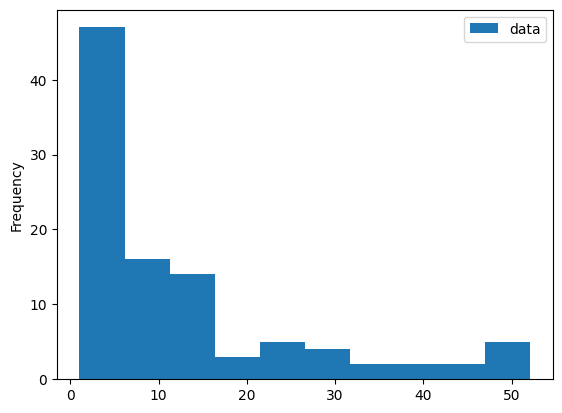

In [55]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

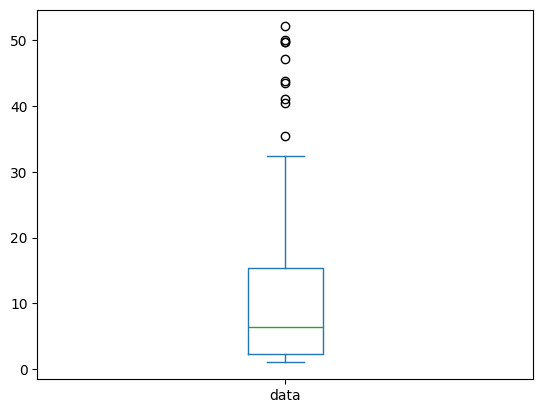

In [56]:
df.plot.box()

Histogram Pros:

It reveals the full shape of the distribution; where most prices lie, presence of multiple peaks, and spread.
It shows frequency counts, making it easy to understand how many drugs fall into each price range.

Cons:

The bins are too wide which can hide details; bins are too narrow and can introduce noise. 
It is difficult to identify exact statistical values like the 75th percentile or median just by looking at the bars.

Boxplot Pros:

Efficiently summarizes core distribution metrics. It displays the median, interquartile range, overall spread, and any outliers.
Instantly reveals skewness. It shows the position of the median within the box and the whisker lengths show asymmetry in the data.
It does great job comparing groups. Ideal for side‑by‑side analysis across categories—even though here we’re examining a single dataset. 

Cons: 

It hides the details of the distribution—no multimodal detection or exact shape you get from the histogram.
It might chellenging for some audiences to interprete quartiles and whiskers. 

I would choose a histogram to show general shape and where expensive drugs fall and perhaps use a boxplot beneath it to clearly mark quartiles, skew, and extreme values.

Modification to make it visually interesting: 

Stack the histogram above the boxplot, sharing the x-axis for easy comparison.
Use 5–10 bins.
Highlight the rightmost bin (highest prices) in a contrasting color like orange or red.
Label whiskers and median clearly on the boxplot.
Highlight outliers as red dots.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [57]:
import pandas as pd

df = pd.read_csv('hypertension_dataset 2.csv')
df.head()
print(df.shape)
print(df.dtypes) 

(174982, 23)
Country                     object
Age                          int64
BMI                        float64
Cholesterol                  int64
Systolic_BP                  int64
Diastolic_BP                 int64
Smoking_Status              object
Alcohol_Intake             float64
Physical_Activity_Level     object
Family_History              object
Diabetes                    object
Stress_Level                 int64
Salt_Intake                float64
Sleep_Duration             float64
Heart_Rate                   int64
LDL                          int64
HDL                          int64
Triglycerides                int64
Glucose                      int64
Gender                      object
Education_Level             object
Employment_Status           object
Hypertension                object
dtype: object


In [58]:
num_cols = df.select_dtypes(include='number').columns
stats = df[num_cols].agg(['mean', 'median', 'std'])
print(stats)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(col, df[col].mode()[0]) 

              Age        BMI  Cholesterol  Systolic_BP  Diastolic_BP  \
mean    53.493319  27.494672   224.539335   134.505229     89.450315   
median  54.000000  27.500000   225.000000   135.000000     89.000000   
std     20.786353   7.213866    43.361589    26.019268     17.310789   

        Alcohol_Intake  Stress_Level  Salt_Intake  Sleep_Duration  Heart_Rate  \
mean         14.991069      5.013041     8.482757        6.996468   74.495085   
median       15.000000      5.000000     8.500000        7.000000   74.000000   
std           8.652624      2.582341     3.750074        1.730731   14.438573   

               LDL        HDL  Triglycerides     Glucose  
mean    129.528271  64.573105     149.569836  134.488187  
median  130.000000  65.000000     150.000000  134.000000  
std      34.635795  20.190666      57.765006   37.526882  
Country Saudi Arabia
Smoking_Status Current
Physical_Activity_Level High
Family_History No
Diabetes No
Gender Female
Education_Level Secondary
Employm

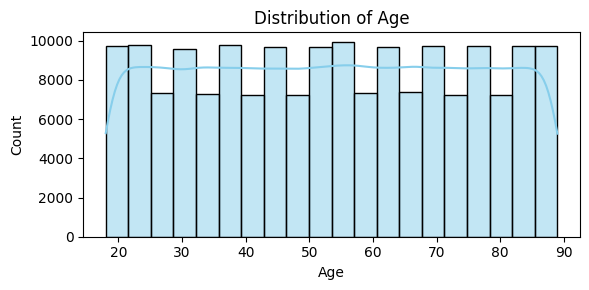

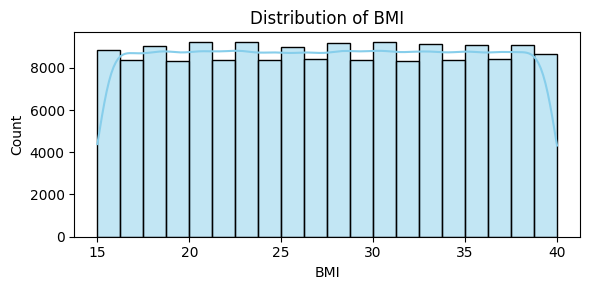

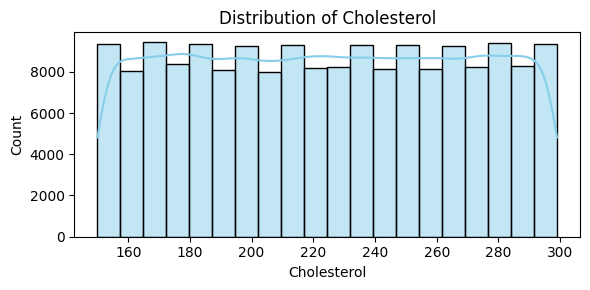

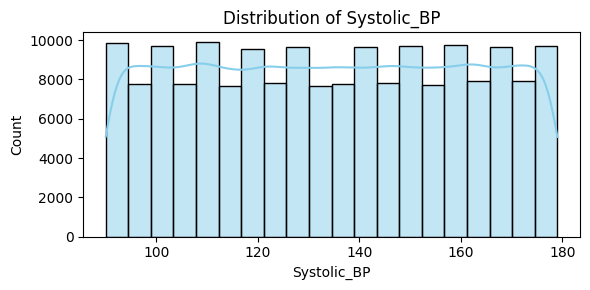

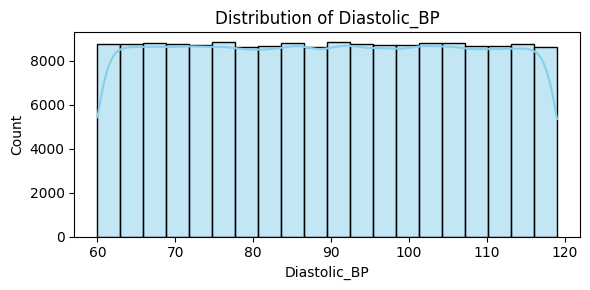

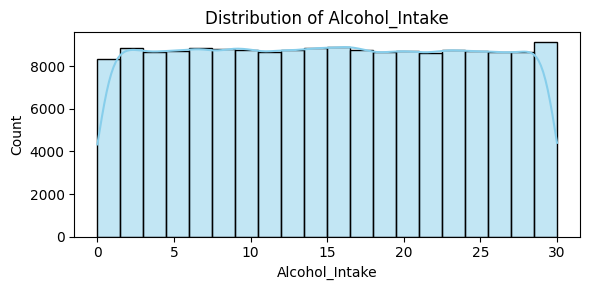

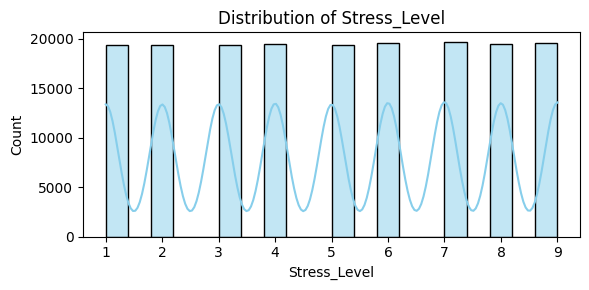

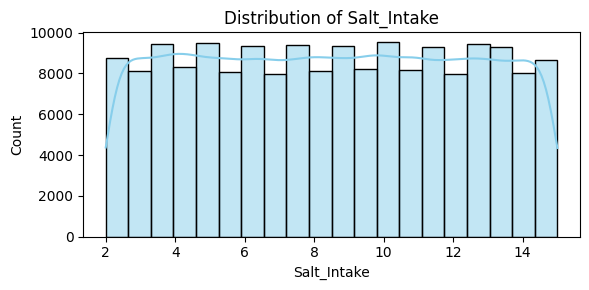

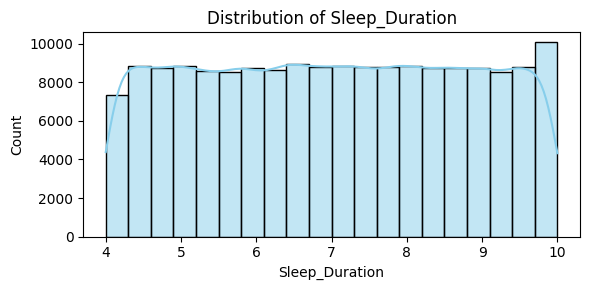

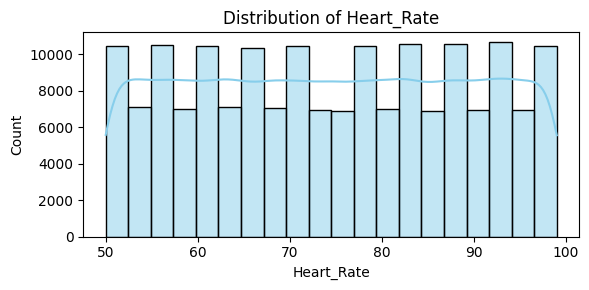

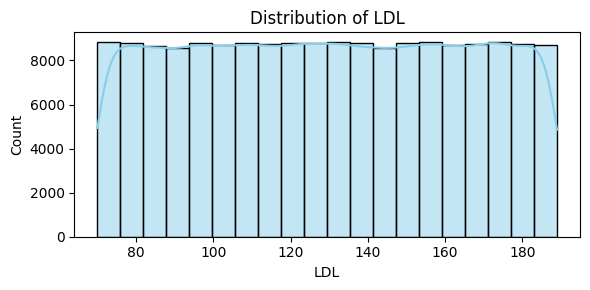

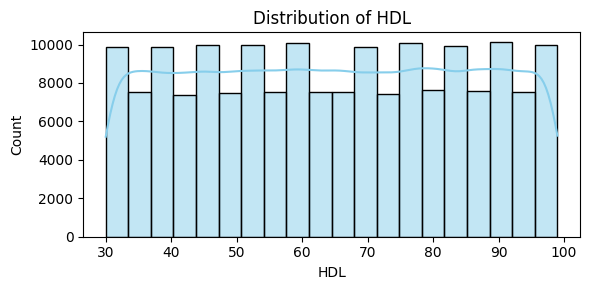

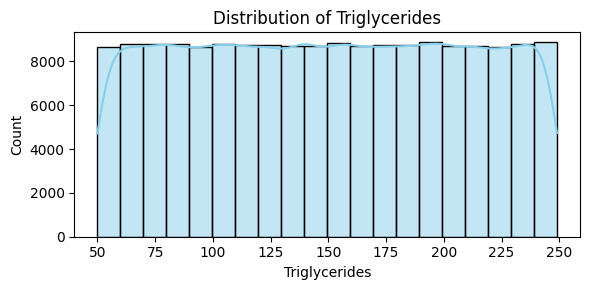

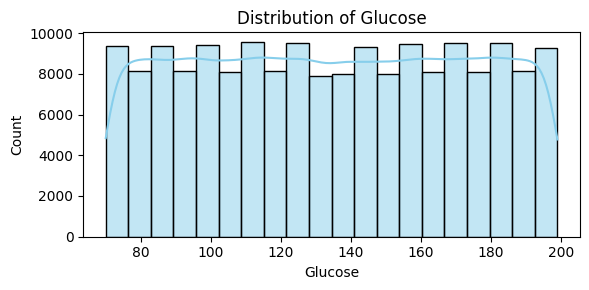

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show() 

In [60]:
print(df.columns.tolist())
df.columns = df.columns.str.strip().str.lower()

['Country', 'Age', 'BMI', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity_Level', 'Family_History', 'Diabetes', 'Stress_Level', 'Salt_Intake', 'Sleep_Duration', 'Heart_Rate', 'LDL', 'HDL', 'Triglycerides', 'Glucose', 'Gender', 'Education_Level', 'Employment_Status', 'Hypertension']


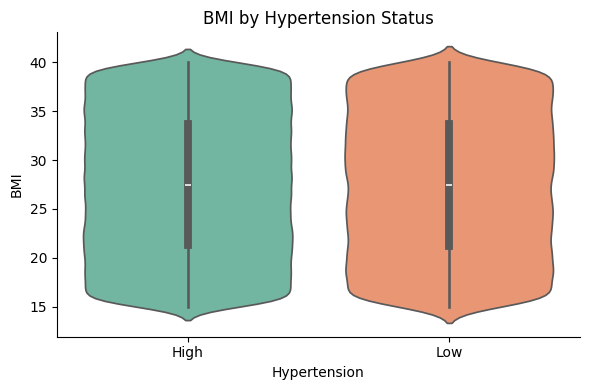

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('hypertension_dataset 2.csv')
df.columns = df.columns.str.strip().str.lower()
plt.figure(figsize=(6, 4))
sns.violinplot(
    x='hypertension',
    y='bmi',
    hue='hypertension',
    data=df,
    palette='Set2',
    legend=False 
    )
sns.despine() 
plt.title('BMI by Hypertension Status')
plt.xlabel('Hypertension')
plt.ylabel('BMI')
plt.tight_layout()
plt.show() 

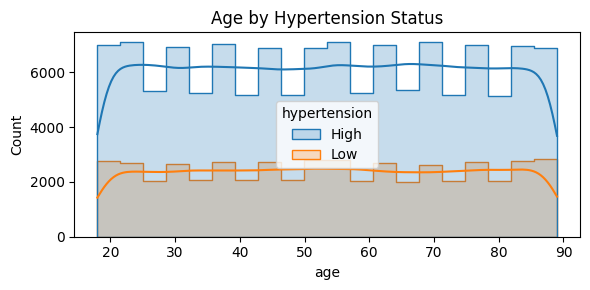

In [62]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='age', hue='hypertension', kde=True, bins=20, element='step')
plt.title('Age by Hypertension Status')
plt.tight_layout()
plt.show() 

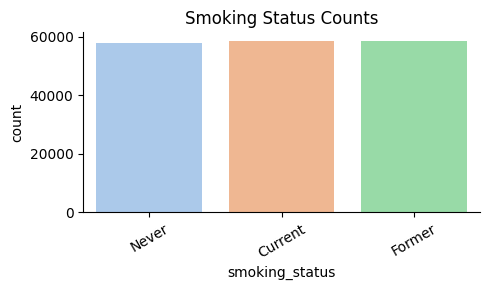

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('hypertension_dataset 2.csv')
df.columns = df.columns.str.strip().str.lower()
plt.figure(figsize=(5, 3))
sns.countplot(
    x='smoking_status',
    hue='smoking_status',
    data=df,
    palette='pastel',
    legend=False   
    )
plt.title('Smoking Status Counts')
plt.xticks(rotation=30)
sns.despine()          
plt.tight_layout()
plt.show() 

In [64]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.max_colwidth')
pd.reset_option('display.width')
pd.reset_option('display.float_format') 


In [65]:
import pandas as pd

df = pd.read_csv('hypertension_dataset 2.csv')
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_', regex=False))
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns
print("Numeric columns:", num_cols.tolist())
print("Categorical columns:", cat_cols.tolist())
summary = pd.DataFrame({
    'mean': df[num_cols].mean(),
    'median': df[num_cols].median()
})
print("\nNumeric Summary:")
print(summary) 

Numeric columns: ['age', 'bmi', 'cholesterol', 'systolic_bp', 'diastolic_bp', 'alcohol_intake', 'stress_level', 'salt_intake', 'sleep_duration', 'heart_rate', 'ldl', 'hdl', 'triglycerides', 'glucose']
Categorical columns: ['country', 'smoking_status', 'physical_activity_level', 'family_history', 'diabetes', 'gender', 'education_level', 'employment_status', 'hypertension']

Numeric Summary:
                      mean  median
age              53.493319    54.0
bmi              27.494672    27.5
cholesterol     224.539335   225.0
systolic_bp     134.505229   135.0
diastolic_bp     89.450315    89.0
alcohol_intake   14.991069    15.0
stress_level      5.013041     5.0
salt_intake       8.482757     8.5
sleep_duration    6.996468     7.0
heart_rate       74.495085    74.0
ldl             129.528271   130.0
hdl              64.573105    65.0
triglycerides   149.569836   150.0
glucose         134.488187   134.0


In [66]:
mode_series = df[cat_cols].mode().iloc[0]
print("\nMode Values for Categorical Columns:")
print(mode_series) 


Mode Values for Categorical Columns:
country                    Saudi Arabia
smoking_status                  Current
physical_activity_level            High
family_history                       No
diabetes                             No
gender                           Female
education_level               Secondary
employment_status               Retired
hypertension                       High
Name: 0, dtype: object


Conclusions:

The hypertension dataset is usable for exploratory analysis and modeling. The variables are well-defined, and the presence of both categorical and numeric features allows for diverse analyses.

Shape of the distribution: 

Numeric Variables: 
Many numeric variables, such as age, BMI, cholesterol levels, and blood pressure readings, exhibit a right-skewed distribution. This suggests that while most individuals have values within a lower range, there is a tail extending towards higher values.

Categorical Variables: 
The distribution of categorical variables like smoking status, physical activity level, and hypertension status can vary. It's important to visualize these distributions to understand the balance between categories.

Outliers present:

Outliers are present in several numeric variables. For example, extremely high cholesterol levels or blood pressure readings.

How the distribution changes across different groups:

Hypertension Status: 
Comparing histograms of blood pressure readings between hypertensive and non-hypertensive individuals can reveal differences in distributions.

Other Factors: 
Variables like age, gender, and lifestyle factors (e.g., smoking, physical activity) can also influence blood pressure distributions.

Minimum and maximum values represented in each histogram:

Numeric Variables: 
The minimum and maximum values for each numeric variable should be examined to ensure they are within expected ranges. For example, a minimum age of 0 or a maximum cholesterol level of 1000 mg/dL would be unrealistic and warrant further investigation.

How bin sizes affect the histogram:

The choice of bin width in histograms can significantly affect the visualization of data distributions. Too wide bins may oversimplify the data, while too narrow bins may introduce noise. 
Changing the bin width reveal different patterns in the data to find an optimal balance that accurately represents the data.

The distribution appear normal:

While some variables may approximate a normal distribution, many health-related metrics, like blood pressure and cholesterol levels, often exhibit skewed distributions due to the prevalence of certain conditions in the population.

Skewed distributions are common in health data, reflecting the fact that most individuals fall within a certain range, with fewer individuals exhibiting extreme values. 




# 4. Storytelling With Data graph 

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

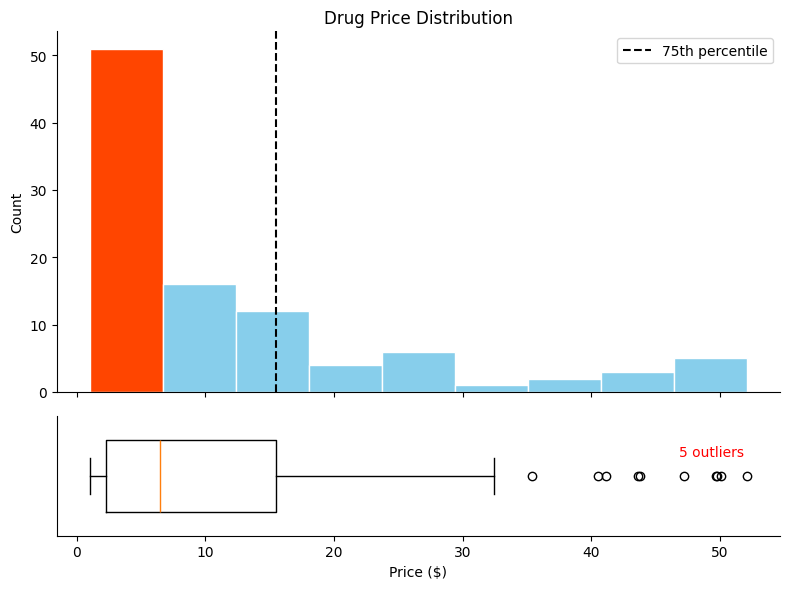

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.exp(np.random.uniform(0, 4, 100))
df = pd.DataFrame(data, columns=['price'])
fig, (ax_hist, ax_box) = plt.subplots(
    2, 1, figsize=(8, 6), sharex=True,
    gridspec_kw={'height_ratios': [3, 1]}
)
bins = np.histogram_bin_edges(df['price'], bins='fd')
counts, edges, patches = ax_hist.hist(
    df['price'], bins=bins, color='skyblue', edgecolor='white'
)
max_bin_index = np.argmax(counts)
for i, patch in enumerate(patches):
    if i == max_bin_index:
        patch.set_facecolor('orangered')
        pct75 = df['price'].quantile(0.75)
ax_hist.axvline(pct75, color='black', linestyle='--', label='75th percentile')
ax_hist.set_ylabel('Count')
ax_hist.legend()
ax_hist.set_title('Drug Price Distribution')
ax_box.boxplot(
    df['price'], vert=False, widths=0.6,
    flierprops={'marker': 'o', 'color': 'red'}
)
ax_box.set_yticks([])
ax_box.set_xlabel('Price ($)')
for ax in (ax_hist, ax_box):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    outliers = df['price'] > edges[-2]
num_outliers = outliers.sum()
ax_box.text(
    0.95, 0.7, f'{num_outliers} outliers', transform=ax_box.transAxes,
    ha='right', va='center', color='red'
)

plt.tight_layout()
plt.show() 